In [ ]:
!pip install implicit

In [111]:
import pandas as pd
import numpy as np
import implicit
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

from implicit.cpu.lmf import LogisticMatrixFactorization
from implicit.cpu.als import AlternatingLeastSquares
from implicit import nearest_neighbours
from implicit.evaluation import mean_average_precision_at_k

In [85]:
df_exp_ratings = pd.read_csv('explicit_ratings_en.csv')

In [86]:
df_exp_ratings.head()

user_id  item_id  watch_percentage           created_at  rating
0   224557      510               100  2018-09-28 16:18:29      10
1   224557      615               100  2018-09-28 16:22:22      10
2   224557     7680               100  2018-09-28 16:23:34      10
3   224293      510               100  2018-09-28 17:20:30      10
4   224293      515               100  2018-09-28 17:40:02      10

`item_id` - Идентификтор курса <br/>
`user_id` - Идентификатор пользователя <br/>
`watch_percentage` - Процент прохождения курса пользователем <br/>
`created_at` - дата и время (видимо, занесения данных в базу, т.е. оценки курса)<br/>
`rating` - Оценка курса пользователем по шкале от 1 до 10

In [270]:
def model_collection(train_matrix):

    als = AlternatingLeastSquares(factors=10, iterations=10, random_state= 25)
    als.fit(train_matrix)

    knn = nearest_neighbours.CosineRecommender(K = 9)
    knn.fit(train_matrix)

    log_mf = LogisticMatrixFactorization(factors = 55, regularization= 0.2, random_state= 25)
    log_mf.fit(train_matrix)

    return als, knn, log_mf


In [201]:
def map_k_collect(k_min, k_max, train_matrix_csr, test_matrix_csr, model = []):

    all_answers = []

    for i_model in model:
        answers = {}
        for iter in range(k_min, k_max+1):
            map_k_score_test = mean_average_precision_at_k(i_model, train_matrix_csr, test_matrix_csr, K=iter)
            answers[iter] = map_k_score_test
        all_answers.append(answers)


    return all_answers


## Рейтинги от 1 до 10

In [123]:
df_exp_ratings["created_at"] = pd.to_datetime(df_exp_ratings["created_at"])
df_exp_ratings = df_exp_ratings.sort_values(by="created_at")

split_idx = int(len(df_exp_ratings) * 0.7)
train_df = df_exp_ratings.iloc[:split_idx]
test_df = df_exp_ratings.iloc[split_idx:]

In [124]:
user_ids_train = train_df["user_id"].astype("category").cat.codes
item_ids_train = train_df["item_id"].astype("category").cat.codes
ratings_train = train_df["rating"].astype(np.float32)

In [125]:
user_ids_test = test_df["user_id"].astype("category").cat.codes
item_ids_test = test_df["item_id"].astype("category").cat.codes
ratings_test = test_df["rating"].astype(np.float32)

In [126]:
train_matrix = coo_matrix((ratings_train, (user_ids_train, item_ids_train)))
test_matrix = coo_matrix((ratings_test, (user_ids_test, item_ids_test)))

In [127]:
train_matrix_csr = train_matrix.tocsr()
test_matrix_csr = test_matrix.tocsr()

In [202]:
als, knn, log_mf = model_collection(train_matrix_csr)

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 9.608268737792969e-05 seconds
  warnings.warn(


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [203]:
answ = map_k_collect(2,20, train_matrix_csr, test_matrix_csr, model = [als, knn, log_mf])

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

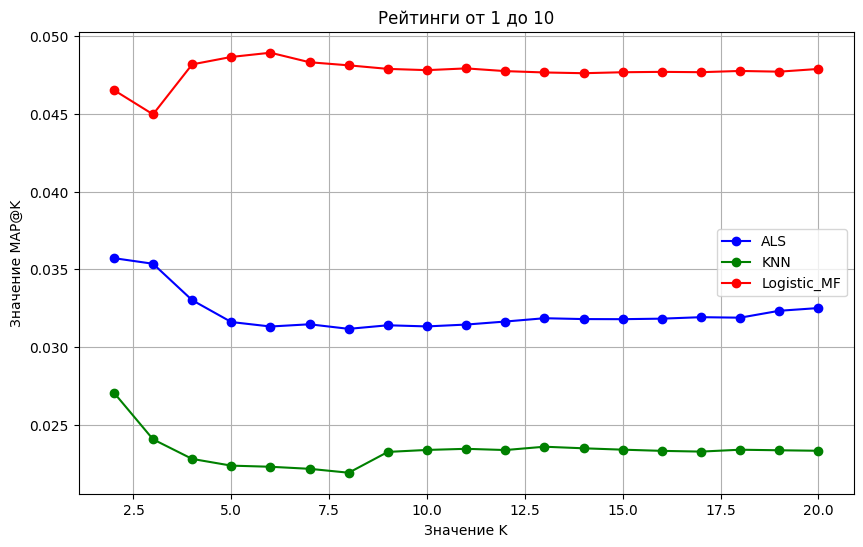

In [205]:
plt.figure(figsize=(10, 6))

labels = ["ALS", "KNN", "Logistic_MF"]
colors = ["blue", "green", "red"]

for i, (label, color) in enumerate(zip(labels, colors)):
    x = list(answ[i].keys())
    y = list(answ[i].values())
    plt.plot(x, y, marker="o", label=label, color=color)

plt.xlabel("Значение K")
plt.ylabel("Значение MAP@K")
plt.title("Рейтинги от 1 до 10")
plt.legend()
plt.grid(True)

plt.show()

## Рейтинги бинарные:
1. Больше средневзвешенной - 1, меньше - 0.
2. Больше средней - 1, меньше - 0

In [229]:
# Взвешенная средняя
rating_weight = df_exp_ratings.groupby('rating')['rating'].count() / df_exp_ratings.rating.count()
weighted_mean = (rating_weight.index * rating_weight).sum()
df_exp_ratings["Binary_weighted"] = (df_exp_ratings["rating"] > weighted_mean).astype(int)

# Обчыная средняя
df_exp_ratings["Binary_basic"] = (df_exp_ratings["rating"] > 5).astype(int)




In [239]:
df_exp_ratings["created_at"] = pd.to_datetime(df_exp_ratings["created_at"])
df_exp_ratings = df_exp_ratings.sort_values(by="created_at")

split_idx = int(len(df_exp_ratings) * 0.7)
train_df = df_exp_ratings.iloc[:split_idx]
test_df = df_exp_ratings.iloc[split_idx:]


# Простая средняя
user_ids_train_basic = train_df["user_id"].astype("category").cat.codes
item_ids_train_basic = train_df["item_id"].astype("category").cat.codes
ratings_train_basic = train_df["Binary_basic"].astype(np.float32)

user_ids_test_basic = test_df["user_id"].astype("category").cat.codes
item_ids_test_basic = test_df["item_id"].astype("category").cat.codes
ratings_test_basic = test_df["Binary_basic"].astype(np.float32)


train_matrix_basic = coo_matrix((ratings_train_basic, (user_ids_train_basic, item_ids_train_basic)))
test_matrix_basic = coo_matrix((ratings_test_basic, (user_ids_test_basic, item_ids_test_basic)))

train_matrix_csr_basic = train_matrix_basic.tocsr()
test_matrix_csr_basic = test_matrix_basic.tocsr()



# Взвешенная средняя
user_ids_train_weight = train_df["user_id"].astype("category").cat.codes
item_ids_train_weight = train_df["item_id"].astype("category").cat.codes
ratings_train_weight = train_df["Binary_weighted"].astype(np.float32)

user_ids_test_weight = test_df["user_id"].astype("category").cat.codes
item_ids_test_weight = test_df["item_id"].astype("category").cat.codes
ratings_test_weight = test_df["Binary_weighted"].astype(np.float32)


train_matrix_weight = coo_matrix((ratings_train_weight, (user_ids_train_weight, item_ids_train_weight)))
test_matrix_weight = coo_matrix((ratings_test_weight, (user_ids_test_weight, item_ids_test_weight)))

train_matrix_csr_weight = train_matrix_weight.tocsr()
test_matrix_csr_weight = test_matrix_weight.tocsr()


In [240]:
als_basic, knn_basic, log_mf_basic = model_collection(train_matrix_csr_basic)
als_weight, knn_weight, log_mf_weight = model_collection(train_matrix_csr_weight)

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/implicit/nearest_neighbours.py:233: RuntimeWarning: invalid value encountered in divide
  X.data = X.data / sqrt(bincount(X.row, X.data**2))[X.row]
/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0001323223114013672 seconds
  warnings.warn(


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00010180473327636719 seconds
  warnings.warn(


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [241]:
answ_basic = map_k_collect(2 ,20, train_matrix_csr_basic, test_matrix_csr_basic, model = [als_basic, knn_basic, log_mf_basic])

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

In [242]:
answ_weight = map_k_collect(2 ,20, train_matrix_csr_weight, test_matrix_csr_weight, model = [als_weight, knn_weight, log_mf_weight])

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

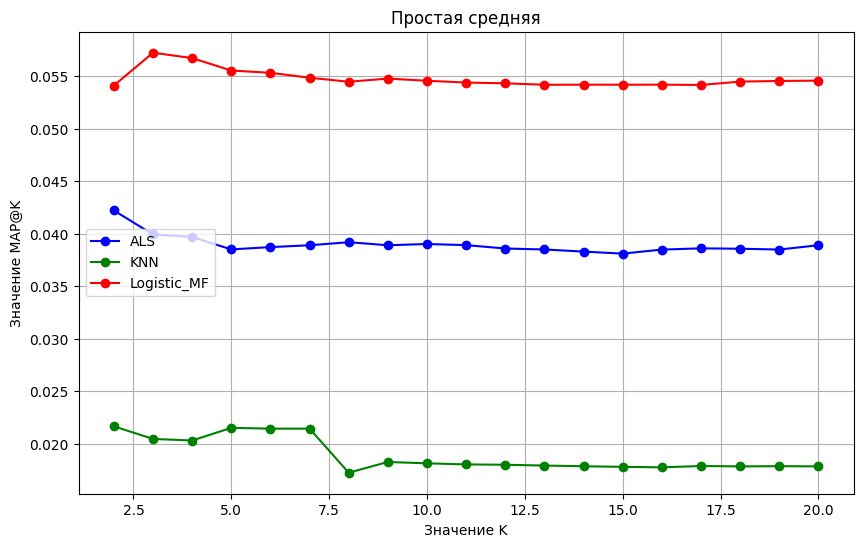

In [243]:
plt.figure(figsize=(10, 6))

labels = ["ALS", "KNN", "Logistic_MF"]
colors = ["blue", "green", "red"]

for i, (label, color) in enumerate(zip(labels, colors)):
    x = list(answ_basic[i].keys())
    y = list(answ_basic[i].values())
    plt.plot(x, y, marker="o", label=label, color=color)


plt.xlabel("Значение K")
plt.ylabel("Значение MAP@K")
plt.title("Простая средняя")
plt.legend()
plt.grid(True)


plt.show()

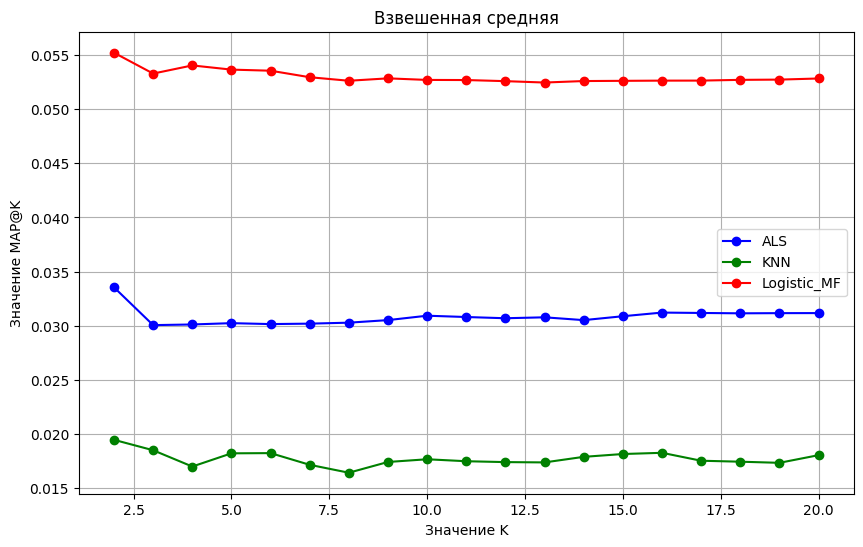

In [249]:
plt.figure(figsize=(10, 6))

labels = ["ALS", "KNN", "Logistic_MF"]
colors = ["blue", "green", "red"]


for i, (label, color) in enumerate(zip(labels, colors)):
    x = list(answ_weight[i].keys())
    y = list(answ_weight[i].values())
    plt.plot(x, y, marker="o", label=label, color=color)


plt.xlabel("Значение K")
plt.ylabel("Значение MAP@K")
plt.title("Взвешенная средняя")
plt.legend()
plt.grid(True)


plt.show()

## Процент просмотра

In [248]:
user_ids_train_pers = train_df["user_id"].astype("category").cat.codes
item_ids_train_pers = train_df["item_id"].astype("category").cat.codes
ratings_train_pers = train_df["watch_percentage"].astype(np.float32)

user_ids_test_pers = test_df["user_id"].astype("category").cat.codes
item_ids_test_pers = test_df["item_id"].astype("category").cat.codes
ratings_test_pers = test_df["watch_percentage"].astype(np.float32)


train_matrix_pers = coo_matrix((ratings_train_pers, (user_ids_train_pers, item_ids_train_pers)))
test_matrix_pers = coo_matrix((ratings_test_pers, (user_ids_test_pers, item_ids_test_pers)))

train_matrix_csr_pers = train_matrix_pers.tocsr()
test_matrix_csr_pers = test_matrix_pers.tocsr()

In [259]:
als_pers, knn_pers, log_mf_pers = model_collection(train_matrix_csr_pers)

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00013446807861328125 seconds
  warnings.warn(


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [260]:
answ_pers = map_k_collect(2, 20, train_matrix_csr_pers, test_matrix_csr_pers, model = [als_pers, knn_pers, log_mf_pers])

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

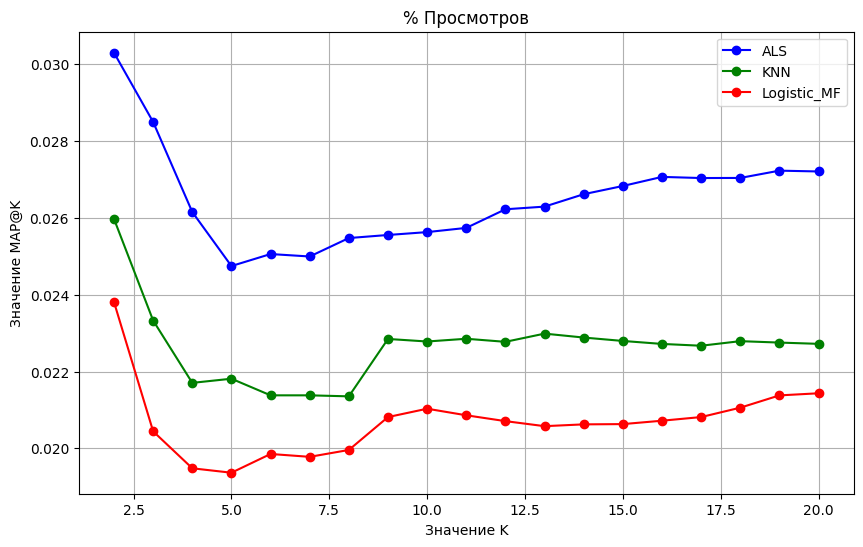

In [274]:
plt.figure(figsize=(10, 6))

labels = ["ALS", "KNN", "Logistic_MF"]
colors = ["blue", "green", "red"]


for i, (label, color) in enumerate(zip(labels, colors)):
    x = list(answ_pers[i].keys())
    y = list(answ_pers[i].values())
    plt.plot(x, y, marker="o", label=label, color=color)


plt.xlabel("Значение K")
plt.ylabel("Значение MAP@K")
plt.title("% Просмотров")
plt.legend()
plt.grid(True)


plt.show()

Logistic_MF удобнее работать с бинарными переменными, чтобы хорошо улавливать связи. Поэтому и резульат упал по метрике.э

In [264]:
# Взвешанные просмотры (бинарная переменная: смотрел/не смотрел)
rating_weight = df_exp_ratings.groupby('watch_percentage')['watch_percentage'].count() / df_exp_ratings.rating.count()
weighted_mean = (rating_weight.index * rating_weight).sum()
df_exp_ratings["Binary_watch"] = (df_exp_ratings["watch_percentage"] > weighted_mean).astype(int)


In [265]:
df_exp_ratings["created_at"] = pd.to_datetime(df_exp_ratings["created_at"])
df_exp_ratings = df_exp_ratings.sort_values(by="created_at")

split_idx = int(len(df_exp_ratings) * 0.7)
train_df = df_exp_ratings.iloc[:split_idx]
test_df = df_exp_ratings.iloc[split_idx:]


# Простая средняя
user_ids_train_watch = train_df["user_id"].astype("category").cat.codes
item_ids_train_watch = train_df["item_id"].astype("category").cat.codes
ratings_train_watch = train_df["Binary_watch"].astype(np.float32)

user_ids_test_watch = test_df["user_id"].astype("category").cat.codes
item_ids_test_watch = test_df["item_id"].astype("category").cat.codes
ratings_test_watch = test_df["Binary_watch"].astype(np.float32)


train_matrix_watch = coo_matrix((ratings_train_watch, (user_ids_train_watch, item_ids_train_watch)))
test_matrix_watch = coo_matrix((ratings_test_watch, (user_ids_test_watch, item_ids_test_watch)))

train_matrix_csr_watch = train_matrix_watch.tocsr()
test_matrix_csr_watch = test_matrix_watch.tocsr()


In [271]:
als_watch, knn_watch, log_mf_watch = model_collection(train_matrix_csr_watch)

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/implicit/nearest_neighbours.py:233: RuntimeWarning: invalid value encountered in divide
  X.data = X.data / sqrt(bincount(X.row, X.data**2))[X.row]
/usr/local/lib/python3.11/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00016260147094726562 seconds
  warnings.warn(


  0%|          | 0/622 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [272]:
answ_watch = map_k_collect(2, 20, train_matrix_csr_watch, test_matrix_csr_watch, model = [als_watch, knn_watch, log_mf_watch])

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

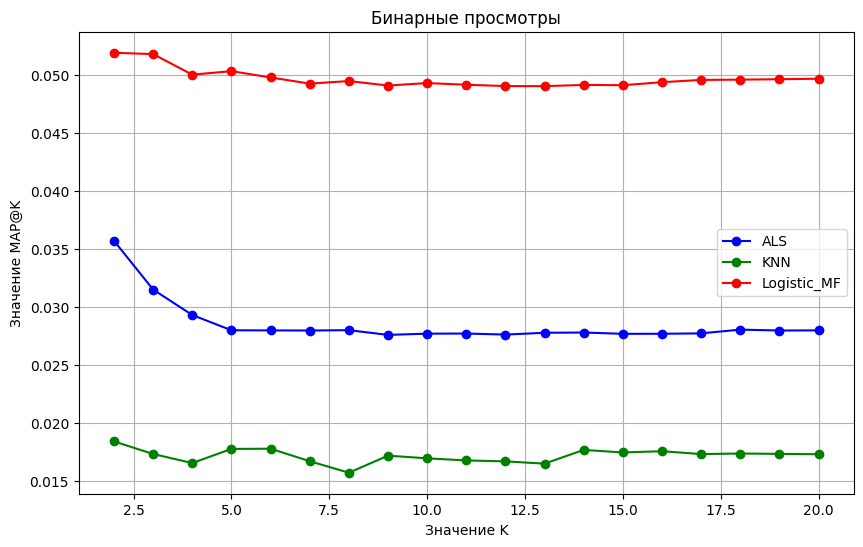

In [273]:
plt.figure(figsize=(10, 6))

labels = ["ALS", "KNN", "Logistic_MF"]
colors = ["blue", "green", "red"]


for i, (label, color) in enumerate(zip(labels, colors)):
    x = list(answ_watch[i].keys())
    y = list(answ_watch[i].values())
    plt.plot(x, y, marker="o", label=label, color=color)


plt.xlabel("Значение K")
plt.ylabel("Значение MAP@K")
plt.title("Бинарные просмотры")
plt.legend()
plt.grid(True)


plt.show()

**Не вставлял результаты по просмотрам, т.к. основной посыл презы в том, что нужно использовать фильтрацию по контенту. Для этого достаточно показать разницу с тем, что были для рейтингов**